# Task 1

In [ ]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd

In [5]:
# Load MNIST dataset and normalize the data
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

xtrain = xtrain.reshape((xtrain.shape[0], -1))
xtest = xtest.reshape((xtest.shape[0], -1))
xtrain = np.divide(xtrain, 255.)
xtest = np.divide(xtest, 255.)

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
# Check the MNIST dataset shapes
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
# Build an SVM model for mnist data 
#[the hyper-parameter 'C' trades off bw margin and the training error and having less value of C provides a good trade off.]

SVM_on_mnist = svm.SVC(C=0.1, kernel='linear', decision_function_shape ='ovo', gamma='scale')

# Train the SVM model on mnist training data
SVM_on_mnist.fit(xtrain, ytrain)

# Perform prediction on mnist test data after training the model
y_pred = SVM_on_mnist.predict(xtest)

In [0]:
# Calculating Accuracy of the model and confusion matrix
Accuracy = metrics.accuracy_score(ytest, y_pred)
Confusion_mat = metrics.confusion_matrix(ytest, y_pred)

Accuracy: 94.72 %

Plotting Confusion Matrix.....:
 [[ 967    0    2    1    1    6    1    1    1    0]
 [   0 1124    2    2    0    1    2    1    3    0]
 [   9    2  974   10    5    2    8    8   14    0]
 [   2    0   14  953    0   16    0   11   13    1]
 [   1    1    6    0  942    0    6    2    2   22]
 [   8    3    1   34    5  807   12    1   19    2]
 [   6    2    8    1    4   15  921    1    0    0]
 [   2    5   23    8    8    0    0  968    0   14]
 [   4    5    5   24    6   27    6    6  888    3]
 [   6    6    2   11   31    2    1   15    7  928]]



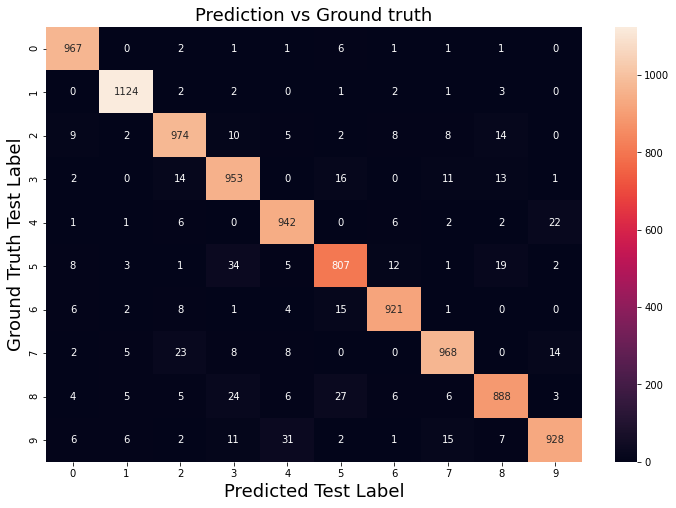

In [30]:
# Printing Accuracy of the model and confusion matrix
print("Accuracy:", Accuracy*100, '%')
print()
print("Plotting Confusion Matrix.....:\n", Confusion_mat)
print()
df_confusion = pd.DataFrame(Confusion_mat, range(10), range(10))
plt.figure(figsize=(12,8))
sn.heatmap(df_confusion, annot=True, annot_kws={"size": 10}, fmt='g') # font size
plt.xlabel("Predicted Test Label", fontsize=18)
plt.ylabel("Ground Truth Test Label", fontsize=18)
plt.title("Prediction vs Ground truth", fontsize=18)
plt.show()

                ########################  End of Task 1 ################################

# Task 2

                                      ############### Start of Task 2 ################

The Lagrange multipliers method is a strategy for finding the local maxima and minima of a function subject to certain equality constraints.\
It states that at any point(stationary) of the function that also satisfies the equality constraints, the gradient of the function at that point can be expressed as linear combination of the gradients of the constraints at that point, with the lagrange multipliers acting as "coefficients".\
Thus, the Lagrangian function is given by,
$$L(x, \lambda ) = f(x)+ \lambda g(x)$$

which indicates that to find the stationary points of a function f(x) subjected to the equality constarint g(x)=0.\
Here,  $$\lambda \rightarrow \, Lagrange\,multiplier$$

Similarly, for the case of only one constituent and only two choice variables/classes with optimization problem as,
$$maximize \,f(x,y) \, subject\, to: \, g(x,y)=0 $$
$$L(x,y, \lambda ) = f(x,y)- \lambda g(x,y)$$

In part 2 of our problem set, we have been given the features as, $$(x_{1}, y_{1}),.... (x_{N}, y_{N})\, where \: \:  y_{1}, y_{2}, ... y_{N} \in \left \{ -1,1 \right \}$$

And the optimization problem to be considered is,
$$
minimize \;\;   W^{T}\cdot W +\, C\sum_{i=1}^{N}\xi _{i} \; \; \; \; \; \;\;\;\;\;  \rightarrow (1)\\
subject\; to: \; \: Y_{i}\cdot(W^{T} \cdot X_{i})\; \; \geq 1-\xi _{i} \; \; \; \;  \rightarrow (2)\\
and\; \xi _{i}\geq 0 \; \;  for\; \;  i=1, 2, ...., N\\
$$
The Lagrange dual problem function can be written in below general form,

$$
L= \underset{\lambda \geq 0,\mu}{\mathrm{max}}\, \underset{x}{\mathrm{min}}\; f(x) + \sum_{i}\mu_{i}g_{i}(x) + \sum_{j}\lambda_{j}h_{j}(x) \;\; \; \; \; \; \; \; \; \; \; \; \; \;   \rightarrow (3)
$$
Considering the given constraints and functions in our problem, the Lagrange dual problem function will be in the below form,
$$
L = \frac{1}{2}W^{T}\cdot W + C\sum_{i=1}^{N}\xi _{i}+ \sum_{i}\mu_{i}(1-y_{i}W^{T}x_{i}-\xi _{i})-\sum_{i=1}^{N}\lambda _{i}\xi _{i}\; \; \; \; \; \; \; \; \rightarrow (4)
$$

Where, $'\mu'\; \; \&\;\;  '\lambda'\; are\; Lagrange\; multipliers.$

We also know that,

$$\underset{x}{\mathrm{min}}\, \underset{\lambda \geq 0}{\mathrm{max}} L(x,\lambda) \;\; \; \; \; \; \; \; \; \; \; \; \; \;   \rightarrow Primal\; problem$$
$$\underset{\lambda \geq 0}{\mathrm{max}}\, \underset{x}{\mathrm{min}}\,  L(x,\lambda) \;\; \; \; \; \; \; \; \; \; \; \; \; \;\rightarrow Dual\; problem$$

Thus, the claim for the duality becomes for our given problem as below,
$$
\underset{w,\xi }{\mathrm{min}}\, \underset{\mu,\lambda}{\mathrm{max}}\;  L\; \geq \underset{\mu, \lambda}{\mathrm{max}}\, \underset{w,\xi}{\mathrm{min}}\;  L
$$
Now, expanding the equation(4) becomes,
$$
L = \frac{1}{2}W^{T}\cdot W + C\sum_{i=1}^{N}\xi _{i}+ \sum_{i}\mu_{i}-\sum_{i}\mu_{i}y_{i}W^{T}x_{i}-\sum_{i}\mu_{i}\xi _{i}-\sum_{i=1}^{N}\lambda _{i}\xi _{i}\; \; \; \; \; \; \; \; \rightarrow (5)
$$

Taking the derivative of Lagrange function in eqn(5) w.r.t. $'W' \;\&\; '\xi'$ and equating with 0, we get,
$${\frac{\partial L }{\partial W}}=  W - \sum_{i}\mu_{i}y_{i}x_{i} = 0 \\
\Rightarrow W= \sum_{i}\mu_{i}y_{i}\vec{x_{i}} \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \rightarrow (6)
$$
And,
$$
{\frac{\partial L }{\partial \xi}}=  C - \mu_{i} - \lambda_{i} = 0 \\ \\
\Rightarrow C= \mu_{i} + \lambda_{i} \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;   \rightarrow (7)\\
$$
Substituting the value of $'W' \; \& \; 'C'$ from equation (6) & (7) into equation(5), we get 
$$
L = \frac{1}{2}W^{T}\sum_{i}\mu_{i}y_{i}\vec{x_{i}} + (\mu_{i}+\lambda_{i})\sum_{i=1}^{N}\xi _{i}+ \sum_{i}\mu_{i}-\sum_{i}W^{T}\mu_{i}y_{i}\vec{x_{i}}-\sum_{i}\mu_{i}\xi _{i}-\sum_{i=1}^{N}\lambda _{i}\xi _{i}\\
$$
After cancelling out the terms,
$$
L = \sum_{i}\mu_{i} - \frac{1}{2}W^{T}\sum_{i}\mu_{i}y_{i}\vec{x_{i}}
$$
Since, $W^{T} \; \rightarrow \; \sum_{j}\mu_{j}y_{j}\vec{x_{j}}$ (can be considered)

We get,
$$
L = \sum_{i}\mu_{i} - \frac{1}{2}\sum_{i,j}\mu_{i}\mu_{j}y_{i}y_{j}(\vec{x_{i}}{x_{j}})
$$
### Margin:
For Primal formulation,
$$
M = \frac{1}{\sqrt{W^T.W \:+\: C\sum_{i=1}^{N}\xi _{i}}}\\
$$
For Dual formulation,
$$
M = \frac{1}{\sqrt{\mu_{i}\mu_{j}y_{i}y_{j}(\vec{x_{i}}{x_{j}})}}
$$
 

### $\underline{Benefits \: of \: maximizing \: the \: margin:}$
1) It leads to sparse set of support vectors.\
2) Controls the overfitting problem.\
3) SVMs theory suggests that it works well with large margin and the predictions are comparably better.

### $\underline{Support \: vectors \: characterization:}$
There are 3 possibilities:\
1) Support vectrors remain on the wrong side of the hyperplane $(\xi_{n} \geq 1)$\
2) They remain on the margin boundaries $(\xi_{n} = 0)$\
3) They remain within the margin region $(0<\xi_{n}<1)$ but on the correct side.

### $\underline{Benefits \: of \: solving \: the \: dual \: problem \: instead \: of \: the \: primal \: problem:}$
1) Solving the dual problem additionaly gives the weights for all contributing points(the support vectors), which can give some information about the input data, and is not available for primal problem solving.\
2) Also, solving the dual problem helps in using the kernal which may not be available with primal.\
3) Optimization is easier in dual as compared to primal when the number of data points is lower than the number of dimensions.

                         ############################## End of Task 2 ##################################

# Task 3

                                ################# Start of Task 3 ###################

The approach followed in multiclass problem is to reduce the single multiclass problem into multiple binary classification problems.\
Primal problem can be written as,
$$
\underset{W_{m}, \xi_{i}}{\mathrm{min}}\, \frac{1}{2}\sum_{m}\left \| W_{m} \right \|^{2} +C\sum_{i}\xi_{i}\\
Subject \; to: \; W_{y_{i}}^{T}\cdot x_{i}-W_{m_{i}}^{T}\cdot x_{i}\; \geq \; e_{i}^{m}-\xi_{i}\; \; \; \; \forall m, i\; \; \; \; \; \; \;  \rightarrow (1)
$$
where,\
$C>0 \; \; \rightarrow \; regularization \; parameter$\
$W_{m} \; \; \; \; \; \rightarrow \; weight \; vector \; associated \; with \; class\; m$\
$e_{i}^{m} \; = \; 1-\delta _{y_{i},m}$

where,
$$
\delta _{y_{i},m} = 
\begin{cases}
1 & \text{ if } y_{i}= m\\ 
0 & \text{ if } y_{i}\neq m \\
\end{cases}
$$
The decision function is,
$$
arg\, \underset{m}{\mathrm{max}}\; W_{m}^{T} \cdot x \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \rightarrow (2)\\
$$
where, 
$$
W_{m}(\alpha )= \sum_{i}\alpha_{i}^{m}x_{i} \; \; \; \; \; \forall m \; \; \; \; \; \; \; \; \; \; \; \; \rightarrow (3)\\
\alpha \; \;  \rightarrow \; \; Vector \; having \;  dual \;  variables \; \alpha_{i}^{m}\; \; \; \; \; \forall m,i \\
$$

The dual problem for multiclass is given by,
$$
\underset{\alpha}{\mathrm{min}}\, f(\alpha) = \frac{1}{2}\sum_{m}\left \| W_{m}(\alpha) \right \|^{2} +\sum_{i}\sum_{m}e_{i}^{m}\alpha_{i}^{m} \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;   \rightarrow (4) \\
Subject \; to: \; (\alpha_{i}^{m} \leq C_{i}^{m} \; \; \forall m, \; \; \; \; \sum_{m}\alpha_{i}^{m}=0)\; \; \; \; \forall i \\
$$
where,
$$
C_{i}^{m} = 
\begin{cases}
0 & \text{ if } y_{i}\neq m\\ 
C & \text{ if } y_{i} = m
\end{cases}
$$
The gradient of $'f'$ w.r.t. $'\alpha'$ is given by,
$$
g_{i}^{m} = \frac{\partial f(\alpha)}{\partial \alpha_{i}^{m}} = W_{m}(\alpha)^T\cdot x_{i} + e_{i}^{m} \; \; \; \; \; \; \forall i,m \; \; \; \; \; \; \; \rightarrow (5)\\
$$
The optimality can be checked using $V_{i}^{m}$ with below conditions,
$$
V_{i}^{m} = 
\begin{cases}
g_{i}^{m} & \text{ if } 0<\alpha_{i}^{m}<C \\
max(0, -g_{i}^{m}) & \text{ if } \alpha_{i}^{m}=0 \\ 
max(0, g_{i}^{m}) & \text{ if } \alpha_{i}^{m}=C\\
\end{cases}
$$
Clearly $V_{i}^{m} \geq 0.$

                     ################################# End of Task 3 ####################################

###### References:
1) Lagrange Multiplier (Wikipedia)\
2) Reference paper: A Sequential dual method for large scale multiclass linear SVMs